In [17]:
import pandas as pd
# import Quandl
import quandl

df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/ df['Adj. Close'] * 100
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open'])/ df['Adj. Open'] * 100

#            Price        x            x               x
df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]

print(df.head())

            Adj. Close    HL_PCT  PCT_Change  Adj. Volume
Date                                                     
2004-08-19   50.322842  3.712563    0.324968   44659000.0
2004-08-20   54.322689  0.710922    7.227007   22834300.0
2004-08-23   54.869377  3.729433   -1.227880   18256100.0
2004-08-24   52.597363  6.417469   -5.726357   15247300.0
2004-08-25   53.164113  1.886792    1.183658    9188600.0


In [18]:
import pandas as pd
import quandl
import math



df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/ df['Adj. Close'] * 100
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open'])/ df['Adj. Open'] * 100


df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]

forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)
print(df.head())

            Adj. Close    HL_PCT  PCT_Change  Adj. Volume      label
Date                                                                
2004-08-19   50.322842  3.712563    0.324968   44659000.0  69.078238
2004-08-20   54.322689  0.710922    7.227007   22834300.0  67.839414
2004-08-23   54.869377  3.729433   -1.227880   18256100.0  68.912727
2004-08-24   52.597363  6.417469   -5.726357   15247300.0  70.668146
2004-08-25   53.164113  1.886792    1.183658    9188600.0  71.219849


In [19]:
import pandas as pd
import quandl
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/ df['Adj. Close'] * 100
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open'])/ df['Adj. Open'] * 100


df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]

forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))
print(forecast_out) #30 Days in advance i

df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)

#features x
#labels y

X = np.array(df.drop(['label'],1))
y = np.array(df['label'])
X = preprocessing.scale(X)
y = np.array(df['label'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1) #THREAD LinearRegression (-1 is maximum ammount)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)

print(accuracy)


#30 Days in advanced it will be 98.4% accurate

35
0.9760945748018384


In [20]:
#Chaning type of Algorithm to svm.SVR

import pandas as pd
import quandl
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/ df['Adj. Close'] * 100
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open'])/ df['Adj. Open'] * 100


df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]

forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))
print(forecast_out) #30 Days in advance i

df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)

#features x
#labels y

X = np.array(df.drop(['label'],1))
y = np.array(df['label'])
X = preprocessing.scale(X)
y = np.array(df['label'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = svm.SVR(gamma='auto') #Using different algorithm 
clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)

print(accuracy)


#35 Days in advanced it will be 81.0% accurate


35
0.8050586194432732


35
[1103.29950575 1073.13430026 1020.64010926 1061.56420774 1073.43396731
 1073.71993266 1092.46191087 1111.49159703 1114.92887433 1123.15111756
 1132.62736065 1129.60987076 1148.90482528 1164.56739139 1136.37672406
 1122.6545123  1088.65370426 1103.74856109 1114.7157512  1121.31188429
 1135.47445912 1149.99249138 1181.57642409 1186.05230588 1158.25758118
 1168.95482577 1170.79899366 1153.5086821  1118.83059262 1115.21303982
 1113.27541566 1070.51083198 1043.24864053 1073.15981015 1022.12979709] 0.9792659995182973 35


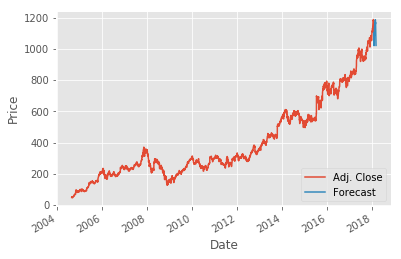

In [21]:
import pandas as pd
import quandl
import math
import numpy as np
import datetime
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')


df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/ df['Adj. Close'] * 100
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open'])/ df['Adj. Open'] * 100


df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]

forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))
print(forecast_out) #30 Days in advance i

df['label'] = df[forecast_col].shift(-forecast_out)


#features x
#labels y

X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)
y = np.array(df['label'])
y = np.array(df['label'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1) #THREAD LinearRegression (-1 is maximum ammount)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)
# print(accuracy)

forecast_set = clf.predict(X_lately)

print(forecast_set, accuracy, forecast_out)

df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
	next_date = datetime.datetime.fromtimestamp(next_unix)
	next_unix += one_day
	df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]


df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

35
[1103.88528257 1074.01936537 1022.11236086 1062.06052971 1073.94367331
 1074.20241675 1092.90739905 1111.89281564 1115.5439988  1123.822813
 1133.4929448  1130.25427014 1149.30465068 1164.96952185 1137.18490057
 1123.41871936 1089.70731771 1104.22667914 1115.26918401 1121.73753197
 1135.93386961 1150.42630188 1182.00986137 1186.66106011 1159.30795813
 1169.54097977 1171.41217603 1154.22294594 1119.46697163 1115.70393675
 1113.93260888 1071.37358509 1044.40615391 1073.53587104 1023.57136231] 0.9790803526533449 35


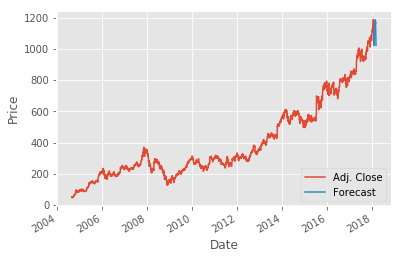

In [22]:
import pandas as pd
import quandl
import math
import numpy as np
import datetime
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

style.use('ggplot')


df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/ df['Adj. Close'] * 100
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open'])/ df['Adj. Open'] * 100


df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]

forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))
print(forecast_out) #30 Days in advance i

df['label'] = df[forecast_col].shift(-forecast_out)


#features x
#labels y

X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)
y = np.array(df['label'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1) #THREAD LinearRegression (-1 is maximum ammount)
clf.fit(X_train, y_train)


#pickle classifier after it has been trained
with open('linearregression.pickle', 'wb') as f:
	pickle.dump(clf, f)

pickle_in = open('linearregression.pickle', 'rb')
clf = pickle.load(pickle_in)

accuracy = clf.score(X_test,y_test)
# print(accuracy)
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
	next_date = datetime.datetime.fromtimestamp(next_unix)
	next_unix += one_day
	df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]


df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


0.42857142857142866 4.0


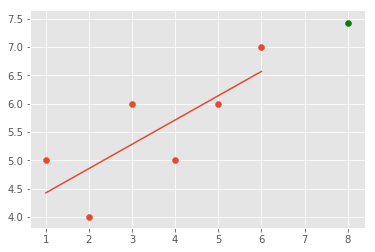

In [23]:
#linear regression 
#y=mx+b


from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')



xs = np.array([1,2,3,4,5,6], dtype=np.float64)
ys = np.array([5,4,6,5,6,7], dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
	m = ( (mean(xs)*mean(ys)) - mean(xs*ys) ) / ( (mean(xs)**2) - mean(xs**2) )
	b = mean(ys)-m*mean(xs)
	return m, b



m, b= best_fit_slope_and_intercept(xs, ys)

print(m, b)

regression_line = [(m*x)+b  for x in xs]


predict_x = 8
predict_y = m*predict_x+b

plt.scatter(xs, ys)
plt.scatter(predict_x,  predict_y, color='g')
plt.plot(xs, regression_line)
plt.show()










0.42857142857142866 4.0
0.5844155844155845


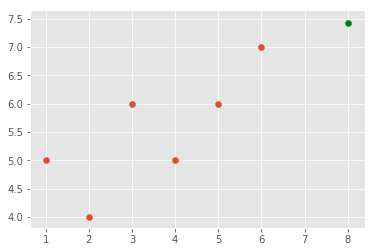

In [24]:
#R Squared Theory

#r^2 = 1 - (SE hat y (best fit line)/ SE mean y)


#linear regression 
#y=mx+b


from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style





xs = np.array([1,2,3,4,5,6], dtype=np.float64)
ys = np.array([5,4,6,5,6,7], dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
	m = ( (mean(xs)*mean(ys)) - mean(xs*ys) ) / ( (mean(xs)**2) - mean(xs**2) )
	b = mean(ys)-m*mean(xs)
	return m, b

def squared_error(ys_orig, ys_line):
	return sum((ys_line-ys_orig)**2)

def coefficient_of_determination(ys_orig, ys_line):
	y_mean_line = [mean(ys_orig) for y in ys_orig]
	squared_error_regr = squared_error(ys_orig, ys_line)
	squared_error_y_mean = squared_error(ys_orig, y_mean_line)
	
	return 1-(squared_error_regr/squared_error_y_mean)

m, b= best_fit_slope_and_intercept(xs, ys)

print(m, b)

regression_line = [(m*x)+b  for x in xs]


predict_x = 8
predict_y = m*predict_x+b


r_squared = coefficient_of_determination(ys, regression_line)

print(r_squared)

plt.scatter(xs, ys)
plt.scatter(predict_x,  predict_y, color='g')
# plt.plot(xs, regression_line)
# # plt.show()




1.2064727954971852 17.44878048780489
0.2868001360928638


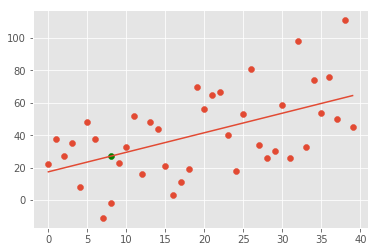

In [25]:
#R Squared Theory

#r^2 = 1 - (SE hat y (best fit line)/ SE mean y)


#linear regression 
#y=mx+b


from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random




# xs = np.array([1,2,3,4,5,6], dtype=np.float64)
# ys = np.array([5,4,6,5,6,7], dtype=np.float64)


def create_dataset(hm, variance, step=2, correlation=False):
	val = 1
	ys = []
	for i in range(hm):
		y = val + random.randrange(-variance, variance)
		ys.append(y)
		if correlation and correlation =='pos':
			val += step
		elif correlation and correlation =='neg':
			val -= step
	xs = [i for i in range(len(ys))]
	return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
	m = ( (mean(xs)*mean(ys)) - mean(xs*ys) ) / ( (mean(xs)**2) - mean(xs**2) )
	b = mean(ys)-m*mean(xs)
	return m, b

def squared_error(ys_orig, ys_line):
	return sum((ys_line-ys_orig)**2)

def coefficient_of_determination(ys_orig, ys_line):
	y_mean_line = [mean(ys_orig) for y in ys_orig]
	squared_error_regr = squared_error(ys_orig, ys_line)
	squared_error_y_mean = squared_error(ys_orig, y_mean_line)
	
	return 1-(squared_error_regr/squared_error_y_mean)


xs, ys = create_dataset(40, 40, 2, correlation='pos')

m, b= best_fit_slope_and_intercept(xs, ys)

print(m, b)

regression_line = [(m*x)+b  for x in xs]


predict_x = 8
predict_y = m*predict_x+b


r_squared = coefficient_of_determination(ys, regression_line)

print(r_squared)

plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.scatter(predict_x,  predict_y, color='g')
plt.show()

In [46]:
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
import pandas as pd


df = pd.read_csv('C:/Users/johnr/Machine Learning/Sklearn-ML/breast-cancer-wisconsin.data')
df.replace('?', -99999, inplace=True)

df.drop(['id'],1, inplace=True)
# df.head()

X = np.array(df.drop(['class'],1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)

accuracy = clf.score(X_test, y_test)
print(accuracy)

example_measures = np.array([[4,2,1,1,1,2,3,2,1],[8,9,10,8,7,10,9,7,1]])

example_measures = example_measures.reshape(len(example_measures),-1)

prediction = clf.predict(example_measures)
print(prediction)

0.9928571428571429
[2 4]


In [48]:
from math import sqrt


plot1 = [1,3]
plot2 = [2,5]

euclidean_distance = sqrt( (plot1[0]-plot2[0])**2 + (plot1[1]-plot2[1])**2 )
print(euclidean_distance)

2.23606797749979


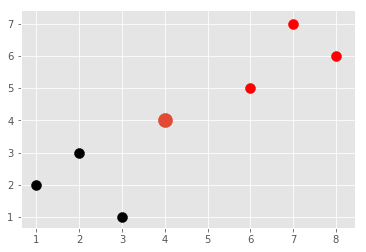

['k', 'r', 'k']
[('k', 2)]


In [55]:
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from collections import Counter
import warnings

# euclidean_distance = sqrt( (plot1[0]-plot2[0])**2 + (plot1[1]-plot2[1])**2 )


dataset = {'k':[[1,2],[2,3],[3,1]], 'r': [[6,5],[7,7],[8,6]]}
new_features = [4,4]
# 
# for i in dataset:
#     for ii in dataset[i]:
#         plt.scatter(ii[0],ii[1], s=100, color=i)
        
[ [plt.scatter(ii[0],ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=200)
plt.show()


def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to value less than total voting groups')
    
    distances =[]
    
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])
    
    votes = [i[1] for i in sorted(distances)[:k]]
    print(votes)
    print(Counter(votes).most_common(1))
    vote_results = Counter(votes).most_common(1)[0][0]
    
    return vote_results


results= k_nearest_neighbors(dataset, new_features, k=3)